# 一、命令行行为标签映射

2023-11-06 19:08:57,872 matplotlib.font_manager WARNING  findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
2023-11-06 19:08:57,873 matplotlib.font_manager WARNING  findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/tmp/ipykernel_4992/2149186985.py:17: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4992/2149186985.py:17: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4992/2149186985.py:17: UserWarning: Glyph 26597 (\N{CJK UNIFIED IDEOGRAPH-67E5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4992/2149186985.py:17: UserWarning: Glyph 25214 (\N{CJK UNIFIED IDEOGRAPH-627E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4992/2149186985.py:17: UserWarning: Glyph 25805 (\N{CJK UNIFIED IDEOGRAPH-64CD}) mi

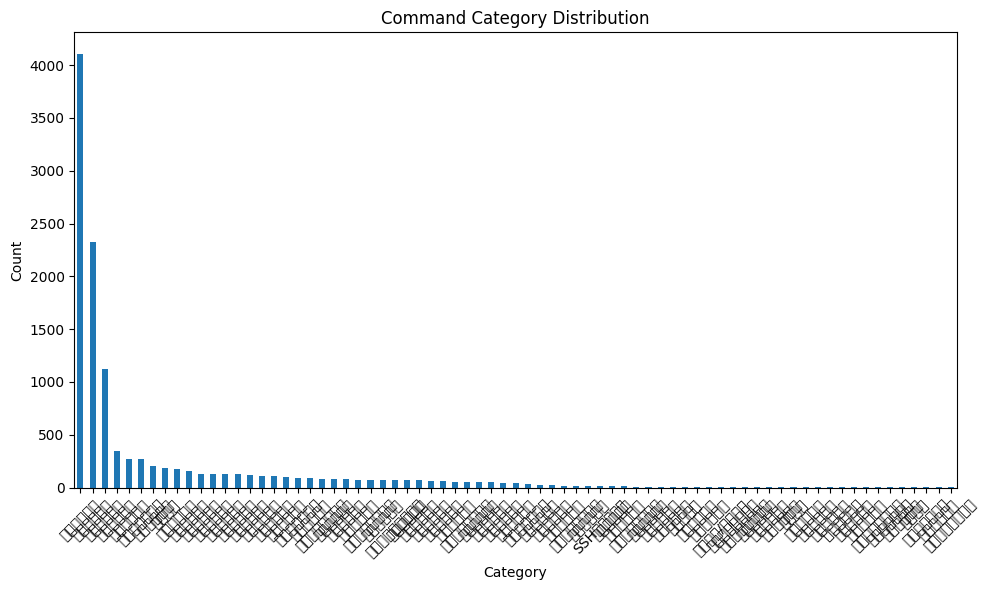

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('1.xlsx')

# 使用groupby和count方法统计不同类别的命令行数量分布
category_counts = df['catelogy'].value_counts()

# 创建直方图
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Command Category Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2023-11-06 18:06:37,518 matplotlib.font_manager WARNING  findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
2023-11-06 18:06:37,519 matplotlib.font_manager WARNING  findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/tmp/ipykernel_4992/3453865056.py:17: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4992/3453865056.py:17: UserWarning: Glyph 32476 (\N{CJK UNIFIED IDEOGRAPH-7EDC}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4992/3453865056.py:17: UserWarning: Glyph 37197 (\N{CJK UNIFIED IDEOGRAPH-914D}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4992/3453865056.py:17: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4992/3453865056.py:17: UserWarning: Glyph 25805 (\N{CJK UNIFIED IDEOGRAPH-64CD}) mi

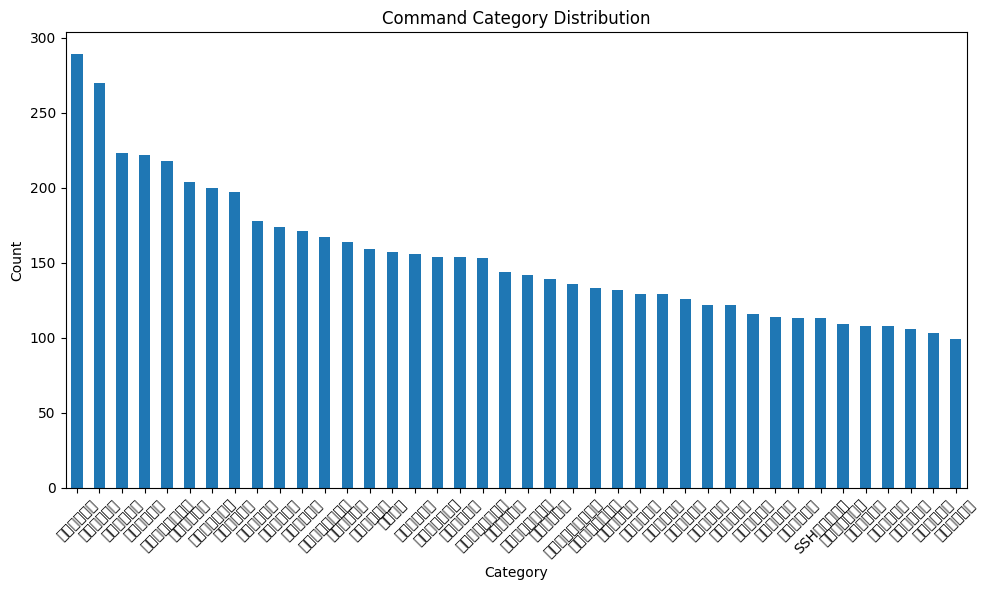

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('last.xlsx')

# 使用groupby和count方法统计不同类别的命令行数量分布
category_counts = df['catelogy'].value_counts()

# 创建直方图
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Command Category Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## hashing + RandomForest

In [11]:
open('slpp.py', 'w').write(open('/root/commandDetect/xgb/slp/slp2.py', 'r').read())

from slpp import ShellTokenizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# 从.xlsx文件中读取数据
data = pd.read_excel('last.xlsx')  # 替换'your_file.xlsx'为实际的文件路径

X = {}
X["raw"] = data['command'].tolist()  # 假设'command'列包含命令行
y = data['catelogy'].tolist() 

t = ShellTokenizer(verbose=True)

shell_tokenizer = ShellTokenizer(verbose=False, debug=False)
hv = HashingVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    n_features=500
)
X["HashingVectorizer"] = hv.fit_transform(X["raw"])

# 创建并训练RandomForestClassifier模型
model = RandomForestClassifier()
model.fit(X["HashingVectorizer"], y)

# 创建分层抽样的交叉验证对象
skf = StratifiedKFold(n_splits=3)

# 进行交叉验证并计算指标
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(model, X["HashingVectorizer"], y, scoring=scoring, cv=skf)

# 输出各项指标的平均值
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")


print("--" * 50)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

# 创建一个随机森林分类器
rf_classifier = RandomForestClassifier()

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# 创建GridSearchCV对象，指定分类器、参数网格和交叉验证策略
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=skf, scoring='accuracy')

# 执行网格搜索以找到最佳参数组合
grid_search.fit(X["HashingVectorizer"], y)

# 打印最佳参数和最佳交叉验证分数
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Cross Validation Results:
Accuracy: 0.7758816837315131
Precision: 0.8215762149287859
Recall: 0.7758816837315131
F1 Score: 0.7758446438112733
----------------------------------------------------------------------------------------------------
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.7753941166910451


## TF-IDF + RandomForest

In [14]:
open('slpp.py', 'w').write(open('/root/commandDetect/xgb/slp/slp2.py', 'r').read())

from slpp import ShellTokenizer
from sklearn.feature_extraction.text import HashingVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# 从.xlsx文件中读取数据
data = pd.read_excel('last.xlsx')  # 替换'your_file.xlsx'为实际的文件路径

X = {}
X["raw"] = data['command'].tolist()  # 假设'command'列包含命令行
y = data['catelogy'].tolist() 

t = ShellTokenizer(verbose=True)

shell_tokenizer = ShellTokenizer(verbose=False, debug=False)

tv = TfidfVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    max_features=500
)
X_tfidf = tv.fit_transform(X["raw"])

# 将TF-IDF特征向量和Hashing特征向量相乘
X["tfidf"] = X_tfidf



# 创建并训练RandomForestClassifier模型
model = RandomForestClassifier()
model.fit(X["tfidf"], y)

# 创建分层抽样的交叉验证对象
skf = StratifiedKFold(n_splits=3)

# 进行交叉验证并计算指标
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(model, X["tfidf"], y, scoring=scoring, cv=skf)

# 输出各项指标的平均值
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")


print("--" * 50)
"""
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

# 创建一个随机森林分类器
rf_classifier = RandomForestClassifier()

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# 创建GridSearchCV对象，指定分类器、参数网格和交叉验证策略
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=skf, scoring='accuracy')

# 执行网格搜索以找到最佳参数组合
grid_search.fit(X["tfidf"], y)

# 打印最佳参数和最佳交叉验证分数
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
"""

Cross Validation Results:
Accuracy: 0.8187875832927026
Precision: 0.9036436938072994
Recall: 0.8187875832927026
F1 Score: 0.8326567313428277
----------------------------------------------------------------------------------------------------


'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nimport pickle\n\n# 创建一个随机森林分类器\nrf_classifier = RandomForestClassifier()\n\n# 定义要搜索的参数网格\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10]\n}\n\n# 创建GridSearchCV对象，指定分类器、参数网格和交叉验证策略\ngrid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=skf, scoring=\'accuracy\')\n\n# 执行网格搜索以找到最佳参数组合\ngrid_search.fit(X["tfidf"], y)\n\n# 打印最佳参数和最佳交叉验证分数\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Cross-Validation Score:", grid_search.best_score_)\n'

## one-hot + RandomForest

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import matplotlib.pyplot as plt


# 从.xlsx文件中读取数据
data = pd.read_excel('last.xlsx')

X = {}
X["raw"] = data['command'].tolist()
y = data['catelogy'].tolist()

# 使用CountVectorizer将文本特征转换为One-Hot编码
count_vectorizer = CountVectorizer(lowercase=False, binary=True)
X_one_hot = count_vectorizer.fit_transform(X["raw"])

# 创建并训练RandomForestClassifier模型
model = RandomForestClassifier()
model.fit(X_one_hot, y)

# 创建分层抽样的交叉验证对象
skf = StratifiedKFold(n_splits=3)

# 进行交叉验证并计算指标
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(model, X_one_hot, y, scoring=scoring, cv=skf)

# 输出各项指标的平均值
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")


Cross Validation Results:
Accuracy: 0.8231756866569153
Precision: 0.9032647202566665
Recall: 0.8231756866569153
F1 Score: 0.834467853517134


## maxx + RandomForest

In [24]:
open('slpp.py', 'w').write(open('/root/commandDetect/xgb/slp/slp2.py', 'r').read())

from slpp import ShellTokenizer
from sklearn.feature_extraction.text import HashingVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# 从.xlsx文件中读取数据
data = pd.read_excel('last.xlsx')  # 替换'your_file.xlsx'为实际的文件路径

X = {}
X["raw"] = data['command'].tolist()  # 假设'command'列包含命令行
y = data['catelogy'].tolist() 

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

t = ShellTokenizer(verbose=True)

shell_tokenizer = ShellTokenizer(verbose=False, debug=False)

tv = TfidfVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    max_features=500
)
X_tfidf = tv.fit_transform(X["raw"])

# 使用HashingVectorizer获取Hashing特征向量
hv = HashingVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    n_features=500
)
X_hashing = hv.fit_transform(X["raw"])

X_one_hot = count_vectorizer.fit_transform(X["raw"])

# 将TF-IDF特征向量和Hashing特征向量相乘
X["maxx"] = X_tfidf + X_hashing



# 创建并训练RandomForestClassifier模型
model = RandomForestClassifier()
model.fit(X["maxx"], y)

# 创建分层抽样的交叉验证对象
skf = StratifiedKFold(n_splits=3)

# 进行交叉验证并计算指标
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(model, X["maxx"], y, scoring=scoring, cv=skf)

# 输出各项指标的平均值
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")

"""
print("--" * 50)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

# 创建一个随机森林分类器
rf_classifier = RandomForestClassifier()

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# 创建GridSearchCV对象，指定分类器、参数网格和交叉验证策略
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=skf, scoring='accuracy')

# 执行网格搜索以找到最佳参数组合
grid_search.fit(X["maxx"], y)

# 打印最佳参数和最佳交叉验证分数
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
"""


Cross Validation Results:
Accuracy: 0.8022103039167886
Precision: 0.8632326535953831
Recall: 0.8022103039167886
F1 Score: 0.8057392945510228


'\nprint("--" * 50)\n\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nimport pickle\n\n# 创建一个随机森林分类器\nrf_classifier = RandomForestClassifier()\n\n# 定义要搜索的参数网格\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10]\n}\n\n# 创建GridSearchCV对象，指定分类器、参数网格和交叉验证策略\ngrid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=skf, scoring=\'accuracy\')\n\n# 执行网格搜索以找到最佳参数组合\ngrid_search.fit(X["maxx"], y)\n\n# 打印最佳参数和最佳交叉验证分数\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Cross-Validation Score:", grid_search.best_score_)\n'

## maxx2 + RandomForest

In [28]:
open('slpp.py', 'w').write(open('/root/commandDetect/xgb/slp/slp2.py', 'r').read())

from slpp import ShellTokenizer
from sklearn.feature_extraction.text import HashingVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# 从.xlsx文件中读取数据
data = pd.read_excel('last.xlsx')  

X = {}
X["raw"] = data['command'].tolist() 
y = data['catelogy'].tolist() 

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

t = ShellTokenizer(verbose=True)

shell_tokenizer = ShellTokenizer(verbose=False, debug=False)

tv = TfidfVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    max_features=500
)
X_tfidf = tv.fit_transform(X["raw"])

# 使用HashingVectorizer获取Hashing特征向量
hv = HashingVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    n_features=500
)
X_hashing = hv.fit_transform(X["raw"])

rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_tfidf, y)

# Train a Random Forest Classifier on Hashing features
rf_hashing = RandomForestClassifier()
rf_hashing.fit(X_hashing, y)

# Use the trained models to predict probabilities
probs_tfidf = rf_tfidf.predict_proba(X_tfidf)
probs_hashing = rf_hashing.predict_proba(X_hashing)

# Stack the predicted probabilities horizontally
X_stacked = np.hstack([probs_tfidf, probs_hashing])

# Train a meta-classifier on the stacked features
meta_classifier = RandomForestClassifier()
meta_classifier.fit(X_stacked, y)

# Make predictions using the stacked features
y_pred_stacked = meta_classifier.predict(X_stacked)

# Evaluate the stacked model
skf = StratifiedKFold(n_splits=5)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(meta_classifier, X_stacked, y, scoring=scoring, cv=skf)

# Output the evaluation results
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")

Cross Validation Results:
Accuracy: 0.9949623876417479
Precision: 0.9951572828303334
Recall: 0.9949623876417479
F1 Score: 0.9949468134426145


In [81]:
from slpp import ShellTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from gensim.models import Word2Vec

# 从.xlsx文件中读取数据
data = pd.read_excel('last.xlsx')  # 替换'your_file.xlsx'为实际的文件路径

X_raw = data['command'].tolist()  # 假设'command'列包含命令行
y = data['catelogy'].tolist()

# 使用ShellTokenizer对命令行进行分词
t = ShellTokenizer(verbose=True)
X_tokens = [t.tokenize_command(command) for command in X_raw]

# 训练Word2Vec模型获取词嵌入
embedding_model = Word2Vec(sentences=X_tokens, vector_size=100, window=5, min_count=1, workers=4)

# 获取每个命令行的词嵌入表示
X_embeddings = [embedding_model.wv[token] if token in embedding_model.wv else np.zeros(100) for token in X_tokens]


# 将嵌套列表转换为二维NumPy数组
X_embeddings_array = np.vstack(X_embeddings)

# 创建并训练RandomForestClassifier模型
model = RandomForestClassifier()
model.fit(X_embeddings_array, y)

# 创建分层抽样的交叉验证对象
skf = StratifiedKFold(n_splits=3)

# 进行交叉验证并计算指标
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(model, X_embeddings, y, scoring=scoring, cv=skf)

# 输出各项指标的平均值
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")

2023-11-10 13:53:33,828 gensim.models.word2vec INFO     collecting all words and their counts
2023-11-10 13:53:33,831 gensim.models.word2vec INFO     PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-10 13:53:33,838 gensim.models.word2vec INFO     collected 3589 word types from a corpus of 23618 raw words and 6153 sentences
2023-11-10 13:53:33,839 gensim.models.word2vec INFO     Creating a fresh vocabulary
2023-11-10 13:53:33,850 gensim.utils INFO     Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 3589 unique words (100.00% of original 3589, drops 0)', 'datetime': '2023-11-10T13:53:33.850297', 'gensim': '4.3.2', 'python': '3.10.7 (main, May 29 2023, 13:51:48) [GCC 12.2.0]', 'platform': 'Linux-5.19.0-46-generic-x86_64-with-glibc2.36', 'event': 'prepare_vocab'}
2023-11-10 13:53:33,851 gensim.utils INFO     Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 23618 word corpus (100.00% of original 23618, drops 0)', 'datetime': '2023-11-10

TypeError: unhashable type: 'list'

## hash + xgboost

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from slpp import ShellTokenizer
from sklearn.feature_extraction.text import HashingVectorizer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import matplotlib.pyplot as plt


data = pd.read_excel('last.xlsx')  

X = {}
X["raw"] = data['command'].tolist()  
y2 = data['catelogy'].tolist() 

le = LabelEncoder()
y2 = le.fit_transform(y2)
      
# 创建HashingVectorizer
shell_tokenizer = ShellTokenizer(verbose=False, debug=False)
hv = HashingVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    n_features=500
)
X["HashingVectorizer"] = hv.fit_transform(X["raw"])

# 创建并训练XGBoost分类器模型
model = XGBClassifier(objective='multi:softprob', num_class=len(set(y2)))
model.fit(X["HashingVectorizer"], y2)

# 创建分层抽样的交叉验证对象
skf = StratifiedKFold(n_splits=3)

# 进行交叉验证并计算指标
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(model, X["HashingVectorizer"], y2, scoring=scoring, cv=skf, error_score='raise')

# 输出各项指标的平均值
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")


Cross Validation Results:
Accuracy: 0.7479278400780106
Precision: 0.8165136940239236
Recall: 0.7479278400780106
F1 Score: 0.7558734378818722


## tf-idf + xgboost

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from slpp import ShellTokenizer
from sklearn.feature_extraction.text import HashingVectorizer,TfidfVectorizer
from xgboost import XGBClassifier

# 从.xlsx文件中读取数据
data = pd.read_excel('last.xlsx')  # 替换'your_file.xlsx'为实际的文件路径

X = {}
X["raw"] = data['command'].tolist()  # 假设'command'列包含命令行
y = data['catelogy'].tolist() 

t = ShellTokenizer(verbose=True)

shell_tokenizer = ShellTokenizer(verbose=False, debug=False)

tv = TfidfVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    max_features=500
)
X_tfidf = tv.fit_transform(X["raw"])

# 将TF-IDF特征向量和Hashing特征向量相乘
X["tfidf"] = X_tfidf

# 创建并训练XGBoost分类器模型
model = XGBClassifier(objective='multi:softprob', num_class=len(set(y2)))
model.fit(X["tfidf"], y2)

# 创建分层抽样的交叉验证对象
skf = StratifiedKFold(n_splits=3)

# 进行交叉验证并计算指标
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(model, X["tfidf"], y2, scoring=scoring, cv=skf, error_score='raise')

# 输出各项指标的平均值
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")


Cross Validation Results:
Accuracy: 0.798309767593044
Precision: 0.9123344229738054
Recall: 0.798309767593044
F1 Score: 0.818752321357216


## maxx + xgboost

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from slpp import ShellTokenizer
from sklearn.feature_extraction.text import HashingVectorizer,TfidfVectorizer
from xgboost import XGBClassifier

# 从.xlsx文件中读取数据
data = pd.read_excel('last.xlsx')  # 替换'your_file.xlsx'为实际的文件路径

X = {}
X["raw"] = data['command'].tolist()  # 假设'command'列包含命令行
y = data['catelogy'].tolist() 

t = ShellTokenizer(verbose=True)

shell_tokenizer = ShellTokenizer(verbose=False, debug=False)

tv = TfidfVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    max_features=500
)
X_tfidf = tv.fit_transform(X["raw"])

# 使用HashingVectorizer获取Hashing特征向量
hv = HashingVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    n_features=500
)
X_hashing = hv.fit_transform(X["raw"])

# 将TF-IDF特征向量和Hashing特征向量相乘
X["maxx"] = X_tfidf + X_hashing


# 创建并训练XGBoost分类器模型
model = XGBClassifier(objective='multi:softprob', num_class=len(set(y2)))
model.fit(X["maxx"], y2)

# 创建分层抽样的交叉验证对象
skf = StratifiedKFold(n_splits=3)

# 进行交叉验证并计算指标
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(model, X["maxx"], y2, scoring=scoring, cv=skf, error_score='raise')

# 输出各项指标的平均值
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")




Cross Validation Results:
Accuracy: 0.8000975134080935
Precision: 0.8536044860999525
Recall: 0.8000975134080935
F1 Score: 0.7999188324347347


## maxx2 + xgboost

In [30]:
from slpp import ShellTokenizer
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd
import numpy as np

# 从.xlsx文件中读取数据
data = pd.read_excel('last.xlsx')  # 替换'your_file.xlsx'为实际的文件路径

X = {}
X["raw"] = data['command'].tolist()  # 假设'command'列包含命令行
y = data['catelogy'].tolist()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

t = ShellTokenizer(verbose=True)

shell_tokenizer = ShellTokenizer(verbose=False, debug=False)

tv = TfidfVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    max_features=500
)
X_tfidf = tv.fit_transform(X["raw"])

# 使用HashingVectorizer获取Hashing特征向量
hv = HashingVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    n_features=500
)
X_hashing = hv.fit_transform(X["raw"])

# Train an XGBoost Classifier on TF-IDF features
xgb_tfidf = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(label_encoder.classes_)
)
xgb_tfidf.fit(X_tfidf, y)

# Train an XGBoost Classifier on Hashing features
xgb_hashing = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(label_encoder.classes_)
)
xgb_hashing.fit(X_hashing, y)

# Use the trained XGBoost models to predict probabilities
probs_tfidf = xgb_tfidf.predict_proba(X_tfidf)
probs_hashing = xgb_hashing.predict_proba(X_hashing)

# Stack the predicted probabilities horizontally
X_stacked = np.hstack([probs_tfidf, probs_hashing])

# Train a meta-classifier using XGBoost on the stacked features
meta_classifier = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(label_encoder.classes_)
)
meta_classifier.fit(X_stacked, y)

# Make predictions using the stacked features
y_pred_stacked = meta_classifier.predict(X_stacked)

# Evaluate the stacked model
skf = StratifiedKFold(n_splits=5)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(meta_classifier, X_stacked, y, scoring=scoring, cv=skf)

# Output the evaluation results
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")


Cross Validation Results:
Accuracy: 0.9736692357987755
Precision: 0.9756177929817765
Recall: 0.9736692357987755
F1 Score: 0.9735839718127197


## 保存模型中间文件

In [58]:
open('slpp.py', 'w').write(open('/root/commandDetect/xgb/slp/slp2.py', 'r').read())

from slpp import ShellTokenizer
from sklearn.feature_extraction.text import HashingVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle


# 从.xlsx文件中读取数据
data = pd.read_excel('last.xlsx')  # 替换'your_file.xlsx'为实际的文件路径

X = {}
X["raw"] = data['command'].tolist()  # 假设'command'列包含命令行
y = data['catelogy'].tolist() 

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

t = ShellTokenizer(verbose=True)

shell_tokenizer = ShellTokenizer(verbose=False, debug=False)

tv = TfidfVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    max_features=500
)
X_tfidf = tv.fit_transform(X["raw"])

# 使用HashingVectorizer获取Hashing特征向量
hv = HashingVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    n_features=500
)
X_hashing = hv.fit_transform(X["raw"])

rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_tfidf, y)

# Train a Random Forest Classifier on Hashing features
rf_hashing = RandomForestClassifier()
rf_hashing.fit(X_hashing, y)

# Use the trained models to predict probabilities
probs_tfidf = rf_tfidf.predict_proba(X_tfidf)
probs_hashing = rf_hashing.predict_proba(X_hashing)

# Stack the predicted probabilities horizontally
X_stacked = np.hstack([probs_tfidf, probs_hashing])

# Train a meta-classifier on the stacked features
meta_classifier = RandomForestClassifier()
meta_classifier.fit(X_stacked, y)

# Make predictions using the stacked features
y_pred_stacked = meta_classifier.predict(X_stacked)

# Evaluate the stacked model
skf = StratifiedKFold(n_splits=5)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(meta_classifier, X_stacked, y, scoring=scoring, cv=skf)

# Output the evaluation results
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")

# 保存LabelEncoder
with open('label_encoder.pkl', 'wb') as label_encoder_file:
    pickle.dump(label_encoder, label_encoder_file)

# 保存tfidf_vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as tfidf_vectorizer_file:
    pickle.dump(tv, tfidf_vectorizer_file)

# 保存hashing_vectorizer
with open('hashing_vectorizer.pkl', 'wb') as hashing_vectorizer_file:
    pickle.dump(hv, hashing_vectorizer_file)

# 保存rf_tfidf模型
with open('rf_tfidf_model.pkl', 'wb') as rf_tfidf_model_file:
    pickle.dump(rf_tfidf, rf_tfidf_model_file)

# 保存rf_hashing模型
with open('rf_hashing_model.pkl', 'wb') as rf_hashing_model_file:
    pickle.dump(rf_hashing, rf_hashing_model_file)

# 保存meta_classifier模型
with open('meta_classifier_model.pkl', 'wb') as meta_classifier_model_file:
    pickle.dump(meta_classifier, meta_classifier_model_file)

Cross Validation Results:
Accuracy: 0.9952874588047262
Precision: 0.9955187594369891
Recall: 0.9952874588047262
F1 Score: 0.9952775050087361


## 选择maxx2+RF，训练最优超参

In [84]:
from slpp import ShellTokenizer
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
import pandas as pd
import numpy as np
import pickle

# 从.xlsx文件中读取数据
data = pd.read_excel('last.xlsx')  

X = {}
X["raw"] = data['command'].tolist()  # 假设'command'列包含命令行
y = data['catelogy'].tolist()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

tv = TfidfVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    max_features=500
)
X_tfidf = tv.fit_transform(X["raw"])


# 使用HashingVectorizer获取Hashing特征向量
hv = HashingVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None,
    n_features=500
)
X_hashing = hv.fit_transform(X["raw"])

# Define a Random Forest model
rf = RandomForestClassifier()

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_tfidf, y)

# Get the best Random Forest model from grid search
best_rf_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train a Random Forest Classifier on Hashing features
rf_hashing = RandomForestClassifier()
rf_hashing.fit(X_hashing, y)

# Use the trained models to predict probabilities
probs_tfidf = best_rf_model.predict_proba(X_tfidf)
probs_hashing = rf_hashing.predict_proba(X_hashing)

# Stack the predicted probabilities horizontally
X_stacked = np.hstack([probs_tfidf, probs_hashing])

# Train a meta-classifier on the stacked features
meta_classifier = RandomForestClassifier()
meta_classifier.fit(X_stacked, y)

# Make predictions using the stacked features
y_pred_stacked = meta_classifier.predict(X_stacked)

# Evaluate the stacked model
skf = StratifiedKFold(n_splits=5)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(meta_classifier, X_stacked, y, scoring=scoring, cv=skf)

# Output the evaluation results
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Cross Validation Results:
Accuracy: 0.9933365034706398
Precision: 0.9936771409917041
Recall: 0.9933365034706398
F1 Score: 0.9933120550738062


## 加载模型文件进行预测

In [74]:
import pickle
from slpp import ShellTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
import pandas as pd
import numpy as np

# 加载LabelEncoder
with open('label_encoder.pkl', 'rb') as label_encoder_file:
    loaded_label_encoder = pickle.load(label_encoder_file)

# 加载tfidf_vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as tfidf_vectorizer_file:
    loaded_tfidf_vectorizer = pickle.load(tfidf_vectorizer_file)

# 加载hashing_vectorizer
with open('hashing_vectorizer.pkl', 'rb') as hashing_vectorizer_file:
    loaded_hashing_vectorizer = pickle.load(hashing_vectorizer_file)

# 加载rf_tfidf模型
with open('rf_tfidf_model.pkl', 'rb') as rf_tfidf_model_file:
    loaded_rf_tfidf = pickle.load(rf_tfidf_model_file)

# 加载rf_hashing模型
with open('rf_hashing_model.pkl', 'rb') as rf_hashing_model_file:
    loaded_rf_hashing = pickle.load(rf_hashing_model_file)

# 加载meta_classifier模型
with open('meta_classifier_model.pkl', 'rb') as meta_classifier_model_file:
    loaded_meta_classifier = pickle.load(meta_classifier_model_file)

# 准备新命令行数据
new_data = ["ping baidu.com", "useradd maxx", "rename caoshijie","wget 1.1.1.1","service xx start","crontab -e","crontab -e 'maxx'"]

# 使用加载的tfidf_vectorizer处理新数据
new_X_tfidf = loaded_tfidf_vectorizer.transform(new_data)

# 使用加载的hashing_vectorizer处理新数据
new_X_hashing = loaded_hashing_vectorizer.transform(new_data)

# 使用加载的rf_tfidf模型预测新数据的类别概率
new_probs_tfidf = loaded_rf_tfidf.predict_proba(new_X_tfidf)

# 使用加载的rf_hashing模型预测新数据的类别概率
new_probs_hashing = loaded_rf_hashing.predict_proba(new_X_hashing)

# 水平堆叠新数据的预测概率
new_X_stacked = np.hstack([new_probs_tfidf, new_probs_hashing])

# 使用加载的meta_classifier模型预测新数据的类别
new_predictions = loaded_meta_classifier.predict(new_X_stacked)

# 解码预测的标签
new_decoded_predictions = loaded_label_encoder.inverse_transform(new_predictions)

print("Predicted Labels for New Data:")
print(new_decoded_predictions)



Predicted Labels for New Data:
['网络请求操作' '用户编辑操作' '文件重命名操作' '网络请求操作' '系统服务设置操作' '计划任务操作' '计划任务操作']


## 多项式朴素贝叶斯

In [27]:
import pandas as pd
from slpp import ShellTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate

# 读取命令行-技术映射数据
df = pd.read_csv('/root/commandDetect/randomForest/cmd2technique2.csv')

# 获取 "Command" 和 "Technique" 列的值
X_raw = df['Command'].tolist()
y = df['Technique'].tolist()

# 创建ShellTokenizer实例
shell_tokenizer = ShellTokenizer(verbose=False, debug=False)

# 使用 CountVectorizer 创建特征向量
cv = CountVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None
)

X = cv.fit_transform(X_raw)

# 创建并训练Multinomial Naive Bayes模型
model = MultinomialNB()
model.fit(X, y)

# 创建分层抽样的交叉验证对象
skf = StratifiedKFold(n_splits=3)

# 定义评估指标
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# 进行交叉验证并计算指标
cv_results = cross_validate(model, X, y, scoring=scoring, cv=skf)

# 输出各项指标的平均值
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross Validation Results:
Accuracy: 0.2845572354211663
Precision: 0.30773027726851815
Recall: 0.2845572354211663
F1 Score: 0.2451981963904182


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 支持向量机

In [27]:
import pandas as pd
from slpp import ShellTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate

# 读取命令行-技术映射数据
df = pd.read_csv('/root/commandDetect/randomForest/cmd2technique2.csv')

# 获取 "Command" 和 "Technique" 列的值
X_raw = df['Command'].tolist()
y = df['Technique'].tolist()

# 创建ShellTokenizer实例
shell_tokenizer = ShellTokenizer(verbose=False, debug=False)

# 使用 CountVectorizer 创建特征向量
cv = CountVectorizer(
    lowercase=False,
    tokenizer=shell_tokenizer.tokenize_command,
    token_pattern=None
)

X = cv.fit_transform(X_raw)

# 创建并训练Support Vector Machine (SVM) 模型
model = SVC(kernel='linear')
model.fit(X, y)

# 创建分层抽样的交叉验证对象
skf = StratifiedKFold(n_splits=3)

# 定义评估指标
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# 进行交叉验证并计算指标
cv_results = cross_validate(model, X, y, scoring=scoring, cv=skf)

# 输出各项指标的平均值
print("Cross Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"F1 Score: {cv_results['test_f1_weighted'].mean()}")


ValueError: np.nan is an invalid document, expected byte or unicode string.